<a href="https://colab.research.google.com/github/tca-codes/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1

In [1]:
import pandas as pd
filename = '/content/sales_predictions.csv'

In [2]:
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#Project 1 - Part 2

How many rows and columns?

In [3]:
df.shape

(8523, 12)

What are the datatypes of each variable?

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates?

In [5]:
df.duplicated().sum()

0

Identify missing values


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Outlet Identifiers and their Outlet Sizes
#dropna includes null values
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             NaN            555
OUT013             High           932
OUT017             NaN            926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             NaN            929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

Fill missing Outlet Sizes as "Medium" since it is the frequently used value in the dataset.

In [8]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [9]:
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             Medium         555
OUT013             High           932
OUT017             Medium         926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             Medium         929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Item Identifiers and their Item Weights
#dropna includes null values
df.groupby('Item_Identifier')['Item_Weight'].value_counts(dropna=False)

Item_Identifier  Item_Weight
DRA12            11.60          6
DRA24            19.35          5
                 NaN            2
DRA59            8.27           6
                 NaN            2
                               ..
NCZ42            10.50          5
NCZ53            9.60           4
                 NaN            1
NCZ54            14.65          5
                 NaN            2
Name: Item_Weight, Length: 2697, dtype: int64

Fill the Item_Weight based on the Item_identifier values.

In [12]:
d = df.dropna(subset=['Item_Weight']).set_index('Item_Identifier')['Item_Weight'].to_dict()
d

{'FDA15': 9.3,
 'DRC01': 5.92,
 'FDN15': 17.5,
 'FDX07': 19.2,
 'NCD19': 8.93,
 'FDP36': 10.395,
 'FDO10': 13.65,
 'FDH17': 16.2,
 'FDU28': 19.2,
 'FDY07': 11.8,
 'FDA03': 18.5,
 'FDX32': 15.1,
 'FDS46': 17.6,
 'FDF32': 16.35,
 'FDP49': 9.0,
 'NCB42': 11.8,
 'FDU02': 13.35,
 'FDN22': 18.85,
 'NCB30': 14.6,
 'FDR28': 13.85,
 'NCD06': 13.0,
 'FDV10': 7.645,
 'DRJ59': 11.65,
 'FDE51': 5.925,
 'FDV38': 19.25,
 'NCS17': 18.6,
 'FDP33': 18.7,
 'FDO23': 17.85,
 'DRH01': 17.5,
 'NCX29': 10.0,
 'DRZ11': 8.85,
 'FDK43': 9.8,
 'FDA46': 13.6,
 'FDC02': 21.35,
 'FDL50': 12.15,
 'FDM39': 6.42,
 'NCP05': 19.6,
 'FDV49': 10.0,
 'FDL12': 15.85,
 'NCL17': 7.39,
 'FDM40': 10.195,
 'FDR13': 9.895,
 'FDA43': 10.895,
 'NCP18': 12.15,
 'FDK21': 7.905,
 'NCX54': 9.195,
 'DRK35': 8.365,
 'FDY21': 15.1,
 'FDM20': 10.0,
 'FDV27': 7.97,
 'FDC46': 17.7,
 'FDH19': 19.35,
 'FDZ03': 13.65,
 'DRH37': 17.6,
 'NCI17': 8.645,
 'FDJ58': 15.6,
 'FDH35': 18.25,
 'FDG02': 7.855,
 'NCZ18': 7.825,
 'FDC29': 8.39,
 'FDQ10': 12.

In [13]:
df.Item_Weight = df.Item_Identifier.map(d)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since there are Item identifiers that had no specific item weight, fill the null values with the mean of all item weights

In [15]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

Confirm that there are no missing values

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.shape

(8523, 12)

Find and fix any inconsistent categories of data

In [18]:
df['Item_Identifier'].value_counts(dropna=False)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [19]:
df['Item_Weight'].value_counts(dropna=False)

12.150    105
17.600    102
11.800     90
13.650     89
15.100     86
         ... 
5.675       2
8.800       2
6.405       2
6.775       2
5.210       2
Name: Item_Weight, Length: 416, dtype: int64

In [20]:
df['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')

In [22]:
df['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Item_Visibility'].value_counts(dropna=False)

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [24]:
df['Item_Type'].value_counts(dropna=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
df['Item_MRP'].value_counts(dropna=False)

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [26]:
df['Outlet_Identifier'].value_counts(dropna=False)

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [27]:
df['Outlet_Establishment_Year'].value_counts(dropna=False)

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
df['Outlet_Location_Type'].value_counts(dropna=False)

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
df['Outlet_Type'].value_counts(dropna=False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
df['Item_Outlet_Sales'].value_counts(dropna=False)

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Obtain the summary statistics of each of the numerical columns

In [32]:
df['Item_Weight'].describe()

count    8523.000000
mean       12.875420
std         4.645008
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [33]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [34]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [35]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#Project 1 - Part 3

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Histogram to view the distributions of various features in the dataset.

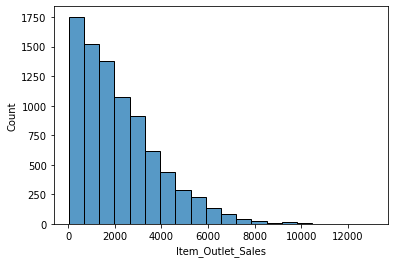

In [37]:
import seaborn as sns
sns.histplot(data=df, x="Item_Outlet_Sales", bins=20);

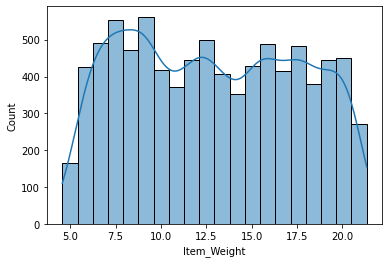

In [38]:
sns.histplot(data=df, x="Item_Weight", bins=20, kde=True);

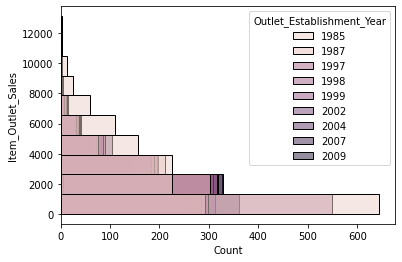

In [39]:
sns.histplot(data=df, y="Item_Outlet_Sales", hue="Outlet_Establishment_Year", bins=10);

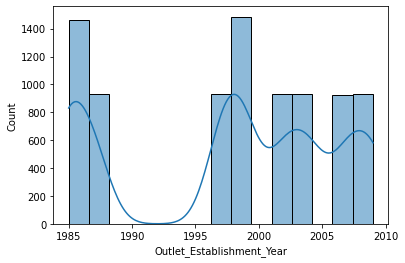

In [40]:
sns.histplot(data=df, x="Outlet_Establishment_Year", kde=True);

Boxplot to view statistical summaries of various features in the dataset.

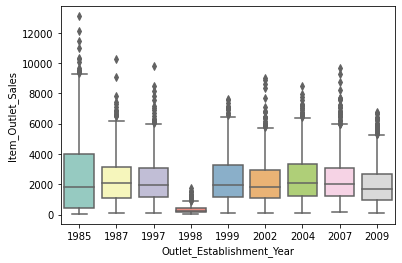

In [41]:
sns.boxplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=df, palette="Set3");

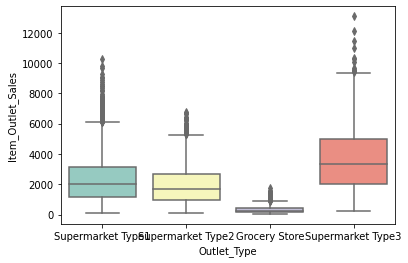

In [42]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df, palette="Set3");

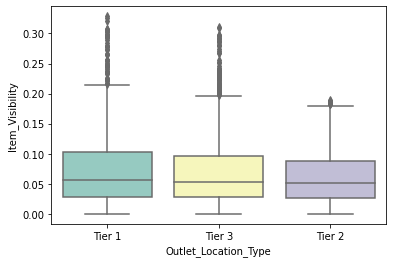

In [43]:
sns.boxplot(x="Outlet_Location_Type", y="Item_Visibility", data=df, palette="Set3");

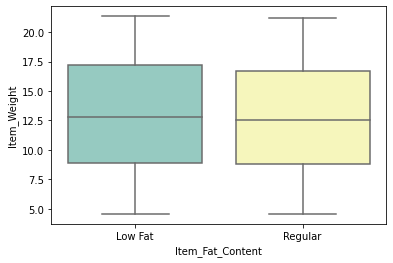

In [44]:
sns.boxplot(x="Item_Fat_Content", y="Item_Weight", data=df, palette="Set3");

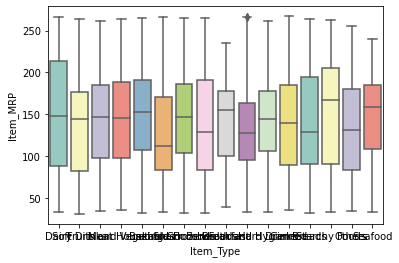

In [45]:
sns.boxplot(x="Item_Type", y="Item_MRP", data=df, palette="Set3");

Heatmap of the correlation between features.

In [46]:
corr = df.corr()

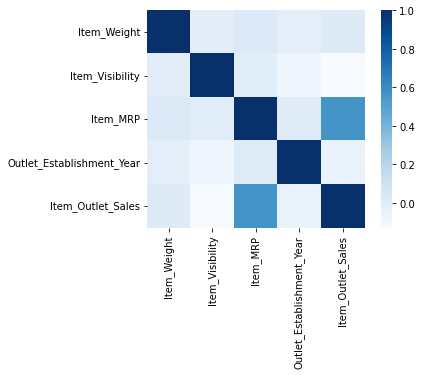

In [47]:
sns.heatmap(corr, square=True, cmap='Blues');

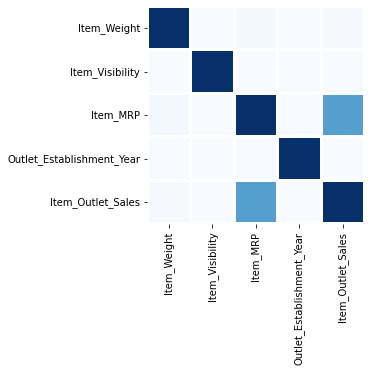

In [48]:
sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues');

Item_MRP and Item_Outlet_Sales have a positive correlation.